<a href="https://colab.research.google.com/github/mtoce/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/Assig3_LS_DS_123_Introduction_to_Bayesian_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



In [0]:
import numpy as np
import scipy.stats as stats
import matplotlib as plt

In [0]:
# Part 1 Below

#-------------------------------------------------------------------------------

In [0]:
# define function
def prob_drunk_given_positive(prob_drunk_prior, false_pos_rate, true_pos_rate):
  p_post = (true_pos_rate * prob_drunk_prior) / ((true_pos_rate * prob_drunk_prior) + (false_pos_rate * (1-prob_drunk_prior)))
  return p_post

In [6]:
# What is the probability  that a person is drunk after one positive breathalyzer test?

print("The probability a person is drunk after one test is: \n", prob_drunk_given_positive(1/1000, .08, 1))

The probability a person is drunk after one test is: 
 0.012357884330202669


In [0]:
# Save that posterior probability to a new value
p_post1 = prob_drunk_given_positive(1/1000, .08, 1)

In [17]:
# Run test again using 1st posterior prob as prob_drunk_prior parameter
p_post2 = prob_drunk_given_positive(p_post1, .08, 1)
print("The probability a person is drunk after **TWO** test is: \n", p_post2)

The probability a person is drunk after **TWO** test is: 
 0.13525210993291495


In [19]:
p_post3 = prob_drunk_given_positive(p_post2, .08, 1)
print("The probability a person is drunk after **THREE** testS is: \n", p_post3)

The probability a person is drunk after **THREE** testS is: 
 0.6615996951348605


In [12]:
p_post4 = prob_drunk_given_positive(p_post3, .08, 1)
print("The probability a person is drunk after **FOUR** test is: \n", p_post4, "\n", "Looks like it takes 4 tests to be >95% sure that the person is drunk beyond the legal limit")

The probability a person is drunk after **FOUR** test is: 
 0.9606895076105054 
 Looks like it takes 4 tests to be >95% sure that the person is drunk beyond the legal limit


In [0]:
# Part 2 Below

#-------------------------------------------------------------------------------

In [0]:
?stats.bayes_mvs

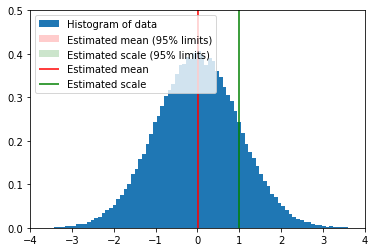

In [20]:
# Example from the above function's docstring

n_samples = 100000
data = stats.norm.rvs(size=n_samples)
res_mean, res_var, res_std = stats.bayes_mvs(data, alpha=0.95)

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(data, bins=100, density=True, label='Histogram of data')
ax.vlines(res_mean.statistic, 0, 0.5, colors='r', label='Estimated mean')
ax.axvspan(res_mean.minmax[0],res_mean.minmax[1], facecolor='r',
            alpha=0.2, label=r'Estimated mean (95% limits)')
ax.vlines(res_std.statistic, 0, 0.5, colors='g', label='Estimated scale')
ax.axvspan(res_std.minmax[0],res_std.minmax[1], facecolor='g', alpha=0.2,
           label=r'Estimated scale (95% limits)')

ax.legend(fontsize=10)
ax.set_xlim([-4, 4])
ax.set_ylim([0, 0.5])
plt.show()

In [0]:
import pandas as pd

In [25]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-03-18 22:42:28--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.06s   

2020-03-18 22:42:34 (287 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [26]:
df = pd.read_csv('house-votes-84.data', names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa'])
print(df.shape)
df.head()

(435, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [0]:
df = df.replace({'y': 1, 'n': 0, '?': np.NaN})

In [0]:
rep = df[df['party'] == 'republican']
dem = df[df['party'] == 'democrat']

In [0]:
df = df.dropna()

In [0]:
rep = df[df['party'] == 'republican']
dem = df[df['party'] == 'democrat']

In [49]:
rep.shape

(108, 17)

In [50]:
dem.shape
dem['budget']

5      1.0
19     1.0
23     1.0
25     1.0
26     1.0
      ... 
421    1.0
422    1.0
423    1.0
426    1.0
431    1.0
Name: budget, Length: 124, dtype: float64

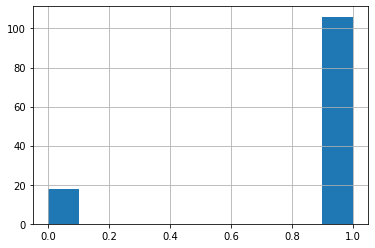

In [51]:
dem['budget'].hist();

In [52]:
dem['budget'].mean()

0.8548387096774194

In [0]:
def confidence_interval(data, confidence=.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  # turn data into array
  data = np.array(data)
  # finds mean 
  mean = np.mean(data)
  n = len(data)
  std_err = stats.sem(data)
  dof = n - 1
  interval = std_err * stats.t.ppf((1 + confidence)/ 2.0, dof)
  return (mean, mean - interval, mean + interval)

In [0]:
bayes_mean, bayes_var, bayes_std = stats.bayes_mvs(dem['budget'], alpha=.95)

In [57]:
bayes_mean

Mean(statistic=0.8548387096774194, minmax=(0.791966749899413, 0.9177106694554258))

In [0]:
# Looking into how I can use this output. What type is it? How can I get floats out?
# Okay so I can index into it like a list in a list. Cool.

In [59]:
type(bayes_mean)

scipy.stats.morestats.Mean

In [65]:
bayes_mean[0]

0.8548387096774194

In [73]:
bayes_mean[1][1]

0.9177106694554258

In [67]:
bayes_var

Variance(statistic=0.12716608904292187, minmax=(0.09889566063309035, 0.1633537230226539))

In [68]:
bayes_std

Std_dev(statistic=0.3558675308324249, minmax=(0.31447680460264527, 0.4041704133439927))

In [0]:
ci = confidence_interval(dem['budget'])

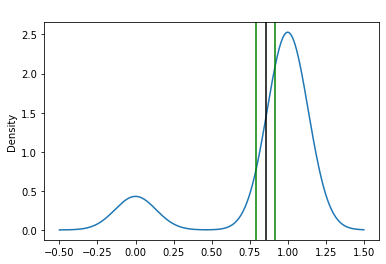

In [71]:
# Graph from yesterday's assig
dem['budget'].plot.density()
plt.title("Democratic Budget Support", color='w')
plt.axvline(ci[0], color='black')
plt.axvline(ci[1], color='green')
plt.axvline(ci[2], color='green')

plt.show;

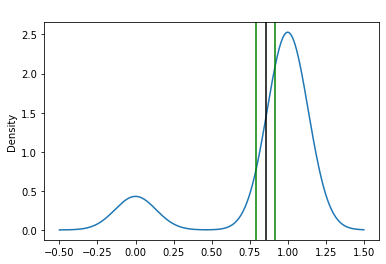

In [72]:
# Graph using stats.bayes_mvs
dem['budget'].plot.density()
plt.title("Democratic Budget Support", color='w')
plt.axvline(bayes_mean[0], color='black')
plt.axvline(bayes_mean[1][0], color='green')
plt.axvline(bayes_mean[1][1], color='green')

plt.show;

In [81]:
print('Frequentist CI and mean: \n', "low_bound:", ci[0],'up_bound:', 
                                                    ci[1], ci[2])
print('Bayesian CI and mean: \n', "low_bound:", bayes_mean[0],'up_bound:', 
                                          bayes_mean[1][0], bayes_mean[1][1])


Frequentist CI and mean: 
 low_bound: 0.8548387096774194 up_bound: 0.791966749899413 0.9177106694554258
Bayesian CI and mean: 
 low_bound: 0.8548387096774194 up_bound: 0.791966749899413 0.9177106694554258


In [0]:
# The means and intervals are the same. It's likely that if there is any
# difference between them, it would be due to the confidence parameter or alpha
# being different.

In [0]:
m, v, s = stats.mvsdist(dem['budget'])

In [101]:
# print(m)
# print(v)
# print(s)
print(m.mean())
print(m.interval(.95))

# If we're looking to look at how different confidence levels affect the
# confidence interval we can change this parameter after using mvdist()
print(m.interval(.99))
print(m.interval(.5))

0.8548387096774194
(0.791966749899413, 0.9177106694554258)
(0.7717355149419298, 0.9379419044129089)
(0.8333516957651421, 0.8763257235896966)


## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!